# **5. Programación con Qiksit**

# **Dive in Learning**

# ***Diplomado en Computación y Programación Cuántica***

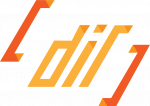

In [ ]:
 !pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.1/125.1 kB 7.4 MB/s eta 0:00:00


In [ ]:
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 69.9 MB/s eta 0:00:00


In [ ]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=19c26bd124cbaa4ed7bf2137d5927777a2d6bdc1509be3c8199d03e5c1238c85
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


# **Compuertas**

Los elementos de la **base computacional** $\{\vert 0\rangle, \vert 1\rangle\}$, son los *vectores de estado*:

$$\vert 0\rangle=\left[ \begin{array}{r} 1 \\ 0 \end{array} \right], ~~~~~~~~~~~~~~~~~~~~ \vert 1\rangle=\left[ \begin{array}{r} 0 \\ 1 \end{array} \right].$$

$\textbf{Compuerta X}$

Esta compuerta es equivalente a la compuerta de negación ($NOT$) en las computadoras clásicas.

*Todos los qubits definidos, sin excepción, comenzaran en el estado* $\vert 0\rangle$

$$X\vert 0\rangle = \vert 1\rangle$$

$$X\vert 1\rangle = \vert 0\rangle$$

Su representación matricial es,

$$X = \text{NOT} =
\begin{bmatrix}
    0 & 1 \\
    1 & 0
\end{bmatrix}
$$

In [ ]:
from qiskit import QuantumCircuit

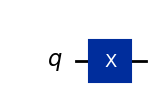

In [ ]:
circ1 = QuantumCircuit(1) # circuito con 1 qubit

circ1.x(0)                # aplicar compuerta X al (único) qubit 0

circ1.draw('mpl')         # mostrar el circuito

Para convertir qubit inicializado en el estado $\vert 0\rangle$ deberemos aplicar la compuerta $CX$ para invertir su inicialización al estado $\vert 1\rangle$

Los elementos de la **base Hadamard** $\{\vert +\rangle, \vert -\rangle\}$, son los *vectores de estado*: Su representación matricial es,

$$H =\frac{1}{\sqrt{2}} \begin{bmatrix}1 & 1 \\
 1 & -1\end{bmatrix}$$

$$H\vert 0\rangle = \vert +\rangle =
\frac{1}{\sqrt{2}}\begin{bmatrix}
1 \\
1
\end{bmatrix}$$

$$H\vert 1\rangle = \vert -\rangle =
\frac{1}{\sqrt{2}}\begin{bmatrix}
1 \\
-1
\end{bmatrix}$$

In [ ]:
from qiskit.quantum_info import Statevector, Operator
from qiskit.visualization import array_to_latex
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Operator

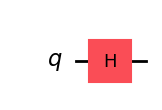

<IPython.core.display.Latex object>

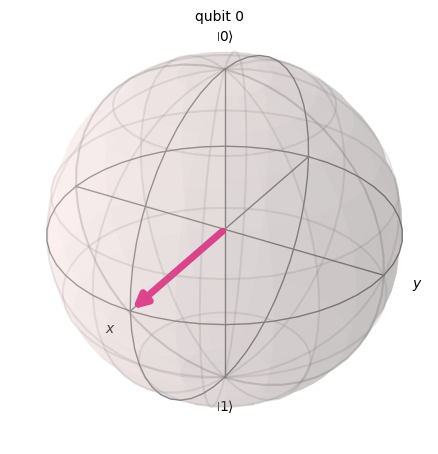

In [ ]:
circuit = QuantumCircuit(1)

circuit.h(0)    # Hadamard en q0

display(circuit.draw('mpl'))

op = Operator(circuit)
display(array_to_latex(op))

psi = Statevector(circuit)

display(plot_bloch_multivector(psi))

# **Entrelazamiento en circuitos cuánticos**

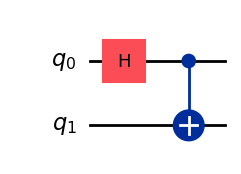

In [ ]:
circ = QuantumCircuit(2)

circ.h(0)                   # aplicar compuerta H al qubit 0
circ.cx(0, 1)               # aplicar compuerta CNOT a los qubits 0 y 1
#circ.cx(0, 2)              # aplicar compuerta CNOT a los qubits 0 y 2

circ.draw('mpl')            # mostrar el circuito

In [ ]:
Statevector(circ).draw('latex', max_size=16, prefix="\\vert\\psi\\rangle = ")

<IPython.core.display.Latex object>

In [ ]:
Operator(circ).draw('latex', max_size=16, prefix="\\vert\\psi\\rangle = ")

<IPython.core.display.Latex object>

$\textbf{Compuerta $SWAP$}$

Esta compuerta es la única compuerta de dos qubits que no representa una operación controlada. $SWAP$ simplemente intercambia dos qubits. Es muy útil cuando se tiene restricción fisica en las conexiones entre qubits.

Sus transiciones son entonces,

$$SWAP \, \vert 00\rangle=\vert 00\rangle$$
$$SWAP \, \vert 01\rangle=\vert 10\rangle$$
$$SWAP \, \vert 10\rangle=\vert 01\rangle$$
$$SWAP \, \vert 11\rangle=\vert 11\rangle$$

Su representación matricial es,

$$ SWAP =
\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1
\end{bmatrix}
$$\
$$ 	|a,b\rangle \Longrightarrow |b,a\rangle $$

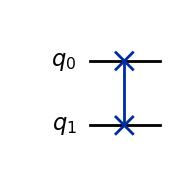

In [ ]:
U_swap = QuantumCircuit(2)

U_swap.swap(0,1)

U_swap.draw('mpl')

In [ ]:
import numpy as np

In [ ]:
Operator(U_swap).draw('latex', max_size=16, prefix="SWAP = ")

<IPython.core.display.Latex object>

Primero, analizaremos el caso en el que el cúbit a está en el estado $|1\rangle$ y el cúbit b está en el estado $|0\rangle$. Para ello, aplicaremos las siguientes puertas:

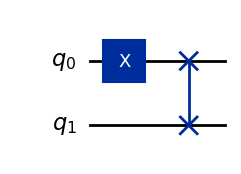


🔵 Estado inicial:


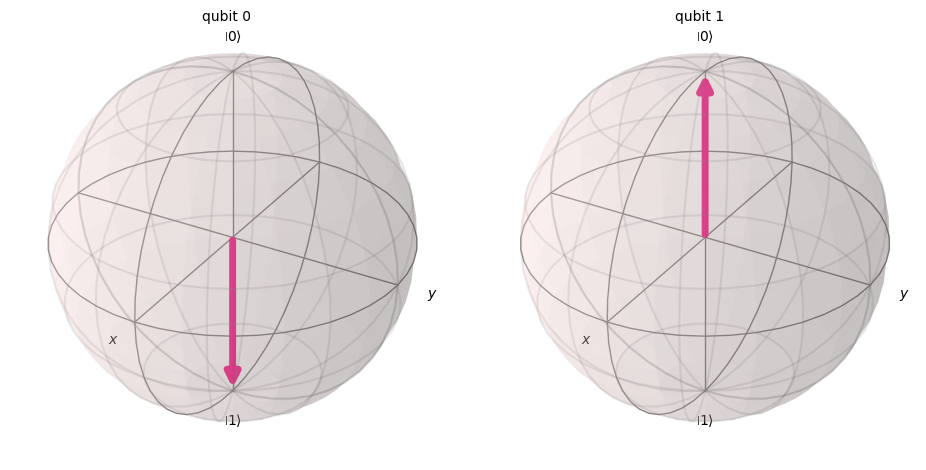

🔵 Estado después de SWAP:


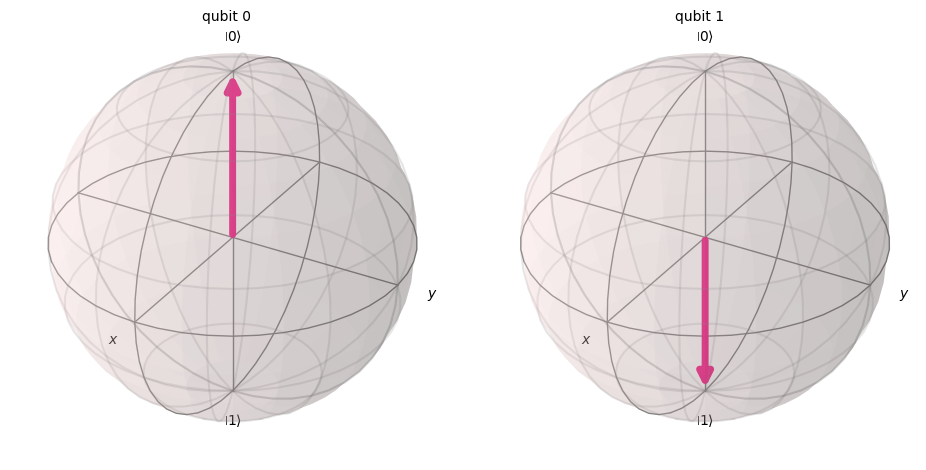

In [ ]:
circ11 = QuantumCircuit(2)    # circuito con 2 qubit

circ11.x(0)                   # obtener el estado |01>

psi_0 = Statevector(circ11)   # estado justo después de crear el circuito e iniciar el qubit en |01>

circ11.swap(0, 1)             # aplicar compuerta SWAP a los dos quibits existentes

psi_1 = Statevector(circ11)   # estado después aplicar la compuerta Z

display(circ11.draw('mpl'))   # mostrar el circuito

print()
print("🔵 Estado inicial:")
display(plot_bloch_multivector(psi_0))

print("🔵 Estado después de SWAP:")
display(plot_bloch_multivector(psi_1))

# **Identidades Básicas de Circuitos**

En el ámbito de la computación cuántica, nuestro objetivo es construir circuitos cuánticos valiosos utilizando componentes fundamentales. Sin embargo, puede haber casos en los que carezcamos de ciertos componentes básicos deseados. En esta sección, exploraremos métodos para convertir entre puertas básicas y utilizarlas para construir puertas relativamente sencillas, aunque ligeramente más complejas.

Las técnicas que se abordan en este capítulo se basan en el trabajo pionero de Barenco y colaboradores, presentado inicialmente en su influyente artículo de 1995. Estas técnicas ofrecen información valiosa sobre la transformación de puertas y su ensamblaje para ampliar nuestro repertorio de componentes de circuitos cuánticos. Al aprovechar estos métodos, podemos sortear las limitaciones que plantea la disponibilidad limitada de puertas y continuar desarrollando circuitos cuánticos sofisticados.

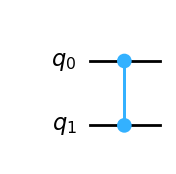

In [ ]:
qcz = QuantumCircuit(2)

# a controlled-Z
qcz.cz(0,1)
qcz.draw('mpl')

Sin embargo, en los dispositivos IBM Q, *el único tipo de puerta de dos cúbits que se puede aplicar directamente es la $CNOT$.* Por lo tanto, necesitamos una forma de transformar una en la otra.

El proceso es bastante sencillo. Sabemos que la función Hadamard transforma los estados $|0\rangle$ y $|1\rangle$ en los estados $|+\rangle$ y $|-\rangle$, respectivamente. También sabemos que el efecto de la puerta $Z$ en los estados $|+\rangle$ y $|-\rangle$ es el mismo que el de $X$ en los estados $|0\rangle$ y $|1\rangle$, respectivamente. A partir de este razonamiento, o simplemente multiplicando matrices, encontramos que:

$$HXH=Z$$

$$HZH=X$$

El mismo truco se puede usar para transformar un $CNOT$ en un $CZ$. Solo necesitamos proceder y seguir el $CNOT$ con un Hadamard en el cúbit objetivo. Esto transformará cualquier $X$ aplicado a ese cúbit en un $Z$.

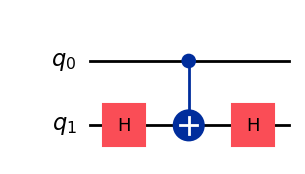

In [ ]:
qc = QuantumCircuit(2)
# also a controlled-Z
qc.h(1)
qc.cx(0,1)
qc.h(1)
qc.draw('mpl')

In [ ]:
Operator(qc).draw('latex', max_size=16, prefix="CZ = ")

<IPython.core.display.Latex object>

In [ ]:
import numpy as np

$$H =\frac{1}{\sqrt{2}} \begin{bmatrix}1 & 1 \\
 1 & -1\end{bmatrix}$$

$$X = \text{NOT} =
\begin{bmatrix}
    0 & 1 \\
    1 & 0
\end{bmatrix}
$$

$$Z=\begin{bmatrix}
    1 & 0 \\
    0 & -1
\end{bmatrix}$$

\begin{align}
HXH & = \frac{1}{\sqrt{2}} \begin{bmatrix}1 & 1 \\
 1 & -1\end{bmatrix}\begin{bmatrix}
    0 & 1 \\
    1 & 0
\end{bmatrix}\frac{1}{\sqrt{2}} \begin{bmatrix}1 & 1 \\
 1 & -1\end{bmatrix}\\\\
 & =\frac{1}{2}\begin{bmatrix}1 & 1 \\
 1 & -1\end{bmatrix}\begin{bmatrix}1 & -1 \\
 1 & 1\end{bmatrix}\\\\
 & =\frac{1}{2}\begin{bmatrix}2 & 0 \\
 0 & -2\end{bmatrix}\\\\
 & =\begin{bmatrix}1 & 0 \\
 0 & -1\end{bmatrix}=Z
\end{align}

\begin{align}
HZH & = \frac{1}{\sqrt{2}} \begin{bmatrix}1 & 1 \\
 1 & -1\end{bmatrix}\begin{bmatrix}1 & 0 \\
 0 & -1\end{bmatrix}\frac{1}{\sqrt{2}} \begin{bmatrix}1 & 1 \\
 1 & -1\end{bmatrix}\\\\
 & =\frac{1}{2}\begin{bmatrix}1 & 1 \\
 1 & -1\end{bmatrix}\begin{bmatrix}1 & 1 \\
 -1 & 1\end{bmatrix}\\\\
 & =\frac{1}{2}\begin{bmatrix}0 & 2 \\
 2 & 0\end{bmatrix}\\\\
 & =\begin{bmatrix}1 & 0 \\
 0 & 1\end{bmatrix}=X
\end{align}

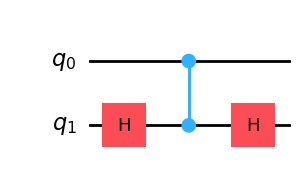

In [ ]:
qcx = QuantumCircuit(2)
# also a controlled-Z
qcx.h(1)
qcx.cz(0,1)
qcx.h(1)
qcx.draw('mpl')

In [ ]:
Operator(qcx).draw('latex', max_size=16, prefix="CX = ")

<IPython.core.display.Latex object>

De forma más general, podemos transformar un único $CNOT$ en una versión controlada de cualquier rotación alrededor de la esfera de Bloch con un ángulo $\pi$, simplemente precediéndolo y siguiéndolo con las rotaciones correctas. Por ejemplo, una $Y$ controlada:

$$S^{\dagger}XS=Y$$

$$S=\begin{bmatrix}1 & 0 \\
 0 & i\end{bmatrix}$$

$$Y=\begin{bmatrix}0 & -i \\
 i & 0\end{bmatrix}$$

\begin{align}
S^{\dagger}YS & = \begin{bmatrix}1 & 0 \\
 0 & -i\end{bmatrix}\begin{bmatrix}0 & -i \\
 i & 0\end{bmatrix}\begin{bmatrix}1 & 0 \\
 0 & i\end{bmatrix}\\\\
 & = \begin{bmatrix}1 & 0 \\
 0 & -i\end{bmatrix}\begin{bmatrix}0 & 1 \\
 i & 0\end{bmatrix}\\\\
 & =\begin{bmatrix}1 & 0 \\
 0 & 1\end{bmatrix}=X
\end{align}

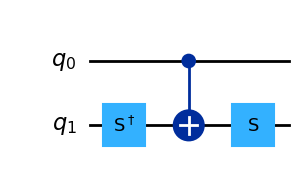

In [ ]:
qcs = QuantumCircuit(2)
# a controlled-Y
qcs.sdg(1)
qcs.cx(0,1)
qcs.s(1)
qcs.draw('mpl')

In [ ]:
Operator(qcs).draw('latex', max_size=16, prefix="CY = ")

<IPython.core.display.Latex object>

y una $CH$ también

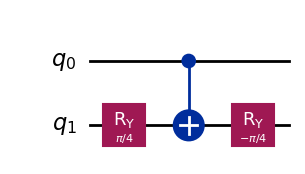

In [ ]:
qcH = QuantumCircuit(2)

# a controlled-H
qcH.ry(np.pi/4,1)
qcH.cx(0,1)
qcH.ry(-np.pi/4,1)
qcH.draw('mpl')

In [ ]:
Operator(qcH).draw('latex', max_size=16, prefix="CH = ")

<IPython.core.display.Latex object>

$\textbf{Compuerta Toffoli , $CCNOT$ o $CCX$}$

Es una compuerta de 3 qubits. Aplicará un $NOT$ si los dos qubits de control están en el estado $\vert 1\rangle$, en caso contrario no aplicará ninguna operación.

Su forma matricial para el caso de que los dos qubits de la izquierda sean los controles, y el de más a la derecha sea el objetivo es como sigue,

$$CCX =\begin{bmatrix}1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\end{bmatrix}$$

Entonces sus transiciones son,

$$CCX \, \vert 000\rangle = \vert 000\rangle$$
$$CCX \, \vert 001\rangle = \vert 001\rangle$$
$$CCX \, \vert 010\rangle = \vert 010\rangle$$
$$CCX \, \vert 011\rangle = \vert 011\rangle$$
$$CCX \, \vert 100\rangle = \vert 100\rangle$$
$$CCX \, \vert 101\rangle = \vert 101\rangle$$
$$CCX \, \vert 110\rangle = \vert 111\rangle$$
$$CCX \, \vert 111\rangle = \vert 110\rangle$$

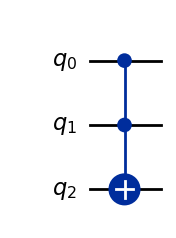

In [ ]:
qcT = QuantumCircuit(3)

# Toffoli with control qubits q0 and q1 and target q2
qcT.ccx(0,1,2)
qcT.draw('mpl')

In [ ]:
Operator(qcT).draw('latex', max_size=16, prefix="CCX = ")

<IPython.core.display.Latex object>

# **Representación de las compuertas: Oráculos**

Una compuerta cuántica que actúa sobre $n$ qubits, esta representada por una matriz unitaria de $2^n\times 2^n$. Los vectores que representan estados cuánticos de dos niveles (qubits) sobre los que actúan las compuertas son vectores unitarios en $2^n$ dimensiones.

La acción de una compuerta en un estado cuántico específico se encuentra multiplicando el vector $\vert \psi_{1}\rangle$ que representa el estado, por la matriz $U_f$ que representa la compuerta. El resultado es un nuevo estado cuántico $\vert \psi_{2}\rangle$:

$$U_f\vert\psi_{1} \rangle=\vert\psi_{2} \rangle$$

Cuando tenemos un qubit, $n=1$, el vector que lo representa tiene dos elementos y una compuerta que opera sobre un qubit es una matriz de $2\times 2$, obtener el estado resultante de aplicar la compuerta será como sigue,

$$U_f\vert \psi_{1}\rangle =
\begin{bmatrix}
    u_{11} & u_{12} \\
    u_{21} & u_{22}
\end{bmatrix}
\begin{bmatrix}
    \alpha \\
    \beta
\end{bmatrix}
=
\begin{bmatrix}
    \alpha \, u_{11} + \beta \, u_{12} \\
    \alpha \, u_{21} + \beta \, u_{22}
\end{bmatrix}
=
\begin{bmatrix}
    \alpha' \\
    \beta'
\end{bmatrix}
= \vert \psi_{2}\rangle
$$

# **6. Algoritmo de Deutsch**

El **algoritmo de Deutsch** [[Deutsch, D.](https://royalsocietypublishing.org/doi/10.1098/rspa.1985.0070)] fue el primer algoritmo que demostró una _ventaja cuántica_: específicamente una reducción en la complejidad de las consultas en comparación con el caso clásico.

$\textbf{El problema}$

Dada una función booleana $f:\{0,1\} \rightarrow \{0, 1\}$, decimos que $f$ está balanceada si $f(0) \neq f(1)$ y constante si $f(0) = f(1)$.

Dado $f:\{0,1\} \rightarrow \{0, 1\}$ como un oráculo, es decir, podemos evaluarlo para una entrada haciendo consultas pero no podemos mirar dentro, el problema es decidir si $f$ es **constante o balanceada**.

En el modelo de computación de Oráculo, sólo puedes hacer preguntas como "¿Qué es $f(0)$?" Cada pregunta que haces es una _consulta a la función $f$_.

En la computación cuántica, muchos algoritmos se basan en este modelo de computación de Oráculo (_Oracle_) y el objetivo es resolver algún problema realizando el mínimo de consultas posible.

$\textbf{Solución clásica}$

Dada una función de este tipo, necesitamos evaluar la función **dos veces** para obtener una respuesta usando una computadora clásica.

$\textbf{Solución cuántica}$

Cada función lógica 'clásica' $f$ se puede convertir en un operador unitario equivalente $U_f$ (construyendo un circuito cuántico lógico). Ahora vamos a ver un algoritmo cuántico que evalúa $U_f$ solo **una vez**.

<div align="center">
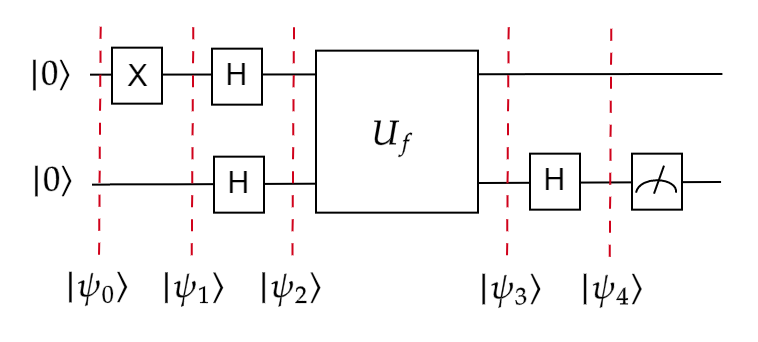

$\textbf{Pasos}$

Comenzamos con el estado inicial $\vert\psi_0\rangle = \vert 0\rangle\vert 0\rangle$. A continuación aplicamos una compuerta $X$ al segundo qubit y obtenemos el estado

$$\vert\psi_1\rangle = \vert 0\rangle\vert 1\rangle.$$

Después de aplicar $H$ a ambos qubits, el primer qubit está en el estado de superposición y el segundo qubit ahora está en el estado $\vert -\rangle$.


$$H =\frac{1}{\sqrt{2}} \begin{bmatrix}1 & 1 \\
 1 & -1\end{bmatrix}$$

$$H\vert 0\rangle = \vert +\rangle =
\frac{1}{\sqrt{2}}\begin{bmatrix}
1 \\
1
\end{bmatrix}$$

$$H\vert 1\rangle = \vert -\rangle =
\frac{1}{\sqrt{2}}\begin{bmatrix}
1 \\
-1
\end{bmatrix}$$

$$H^{\otimes 2}\vert 01\rangle =H^{\otimes 2}\vert 0\rangle_{0}\vert 1\rangle_{1}$$

$$\vert\psi_{2}\rangle =H\left(\vert 0\rangle_{0}\otimes\vert 1\rangle_{1}\right)$$

$$\vert\psi_{2}\rangle =\frac{(\vert 0\rangle+\vert 1\rangle)_{0}}{\sqrt{2}}\frac{(\vert 0\rangle-\vert 1\rangle)_{1}}{\sqrt{2}}$$

\begin{align*}
\vert\psi_2\rangle &= \left(\frac{1}{\sqrt{2}}\vert 0\rangle +\frac{1}{\sqrt{2}}\vert 1\rangle \right) \vert -\rangle \\
&= \frac{1}{\sqrt{2}}\vert 0\rangle\vert -\rangle  +\frac{1}{\sqrt{2}}\vert 1\rangle\vert -\rangle \\
\hspace{-2in}\\
\end{align*}

A continuación aplicamos $U_f$ a $\vert\psi_2\rangle$ y obtenemos $\vert\psi_3\rangle$

$$U_f\vert x\rangle =(-1)^{f(x)}\vert x\rangle$$

\begin{align*}
\\\vert\psi_3\rangle &= U_f\left(\frac{1}{\sqrt{2}}\vert 0\rangle\vert -\rangle+\frac{1}{\sqrt{2}}\vert 1\rangle\vert -\rangle\right) \\
&= \frac{1}{\sqrt{2}}U_f\vert 0\rangle\vert -\rangle+\frac{1}{\sqrt{2}}U_f\vert 1\rangle\vert -\rangle\\
&= \frac{1}{\sqrt{2}}(-1)^{f(0)}\vert 0\rangle\vert -\rangle+\frac{1}{\sqrt{2}}(-1)^{f(1)}\vert 1\rangle\vert -\rangle\\
&= \left(\frac{1}{\sqrt{2}}(-1)^{f(0)}\vert 0\rangle+\frac{1}{\sqrt{2}}(-1)^{f(1)}\vert 1\rangle\right)\vert -\rangle \\
\\
\end{align*}

Centrémonos en el primer qubit. Ahora pasaremos a la notación vectorial ya que el análisis será más sencillo. Podemos expresar $\vert\psi_3\rangle$ usando el siguiente vector:

$$\vert\psi_{3,q_1}\rangle = \frac{1}{\sqrt{2}}\begin{bmatrix}
(-1)^{f(0)} \\
(-1)^{f(1)}
\end{bmatrix} $$

A continuación, aplicamos la compuerta $H$ al primer qubit y obtenemos el siguiente vector de estado:

$$\vert\psi_{4,q_{1}}\rangle =H\vert\psi_{3,q_{1}}\rangle$$

\begin{align*}\vert\psi_{4,q_1}\rangle & = \frac{1}{\sqrt{2}}\begin{bmatrix}
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}\\
\frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}
\end{bmatrix}\frac{1}{\sqrt{2}}\begin{bmatrix}
(-1)^{f(0)} \\
(-1)^{f(1)}
\end{bmatrix}\\\\
&=\frac{1}{2}\begin{bmatrix}
(-1)^{f(0)}+(-1)^{f(1)} \\
(-1)^{f(0)}-(-1)^{f(1)}
\end{bmatrix}
\end{align*}

$\textbf{Ahora consideremos los dos casos}$

- $f$ es **constante**:

En este caso como$ f(0) = f(1) $ entonces

$$\vert\psi_{4,q_1}\rangle= \begin{bmatrix}
(-1)^{f(0)} \\
0
\end{bmatrix} = (-1)^{f(0)} \vert 0\rangle$$

Por lo tanto, observamos $0$ con $100\%$ de probabilidad.

- $f$ es **balanceada**:

En este caso como $ f(0) \neq f(1) $ entonces

$$\vert\psi_{4,q_1}\rangle= \begin{bmatrix}
0 \\
(-1)^{f(0)}
\end{bmatrix} = (-1)^{f(0)} \vert 1\rangle$$

Por tanto, observamos $1$ con $100\%$ de probabilidad.

El algoritmo de Deutsch demuestra que se puede resolver el mismo problema realizando sólo 1 consulta en lugar de 2, sin cometer ningún error.

Este es uno de los primeros resultados en los que obtenemos ventaja al utilizar la computación cuántica. Pero aún no es una aceleración suficiente, existe muchos más algoritmos donde esta brecha es aún mayor.

# **Implementación en Qiskit**

$$\vert\psi_{1}\rangle =\vert 10\rangle$$

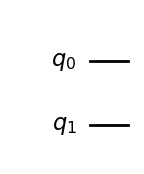

In [ ]:
s_circuit = QuantumCircuit(2)
s_circuit.draw('mpl')

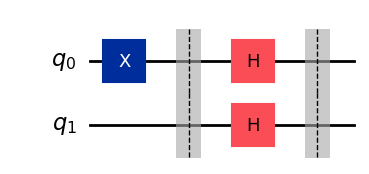

In [ ]:
# Paso 1
s_circuit.x(0)
s_circuit.barrier()

# Paso 2
s_circuit.h(0)
s_circuit.h(1)
s_circuit.barrier()

s_circuit.draw('mpl')

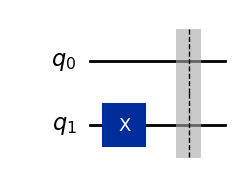

In [ ]:
# Constante: f(x) = 1
oracle_const_1 = QuantumCircuit(2, name="f(x)=1")
oracle_const_1.x(1)
oracle_const_1.barrier()

oracle_const_1.draw('mpl')

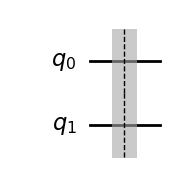

In [ ]:
# Constante: f(x) = 0
oracle_const_2 = QuantumCircuit(2, name="f(x)=0")
oracle_const_2.barrier()

oracle_const_2.draw('mpl')

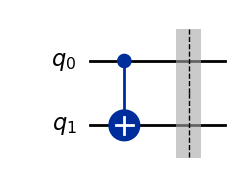

In [ ]:
# Balanceado: f(x) = x
oracle_bal_1 = QuantumCircuit(2, name="f(x)=x")
oracle_bal_1.cx(0, 1)
oracle_bal_1.barrier()

oracle_bal_1.draw('mpl')

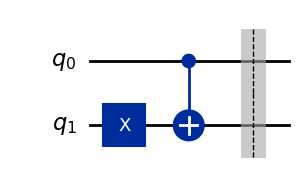

In [ ]:
# Balanceado: f(x) = ¬x
oracle_bal_2 = QuantumCircuit(2, name="f(x)=¬x")
oracle_bal_2.x(1)
oracle_bal_2.cx(0, 1)
oracle_bal_2.barrier()

oracle_bal_2.draw('mpl')

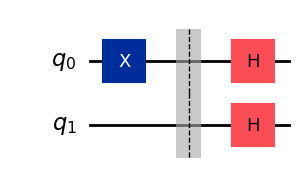

In [ ]:
sh_circuit = QuantumCircuit(2)
# Paso 1
sh_circuit.x(0)
sh_circuit.barrier()
# Paso 2
sh_circuit.h(0)
sh_circuit.h(1)
# Paso 3
sh_circuit.draw('mpl')

In [ ]:
Statevector(sh_circuit).draw('latex')

<IPython.core.display.Latex object>

Ahora sigue la aplicación del oráculo de la forma $U_{f}\vert\psi_{2}\rangle$ para obtener $\vert\psi_{3}\rangle$

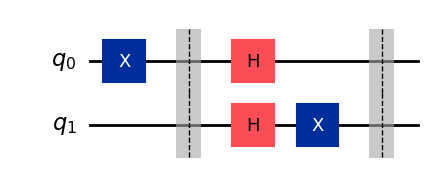

In [ ]:
Uf_sh_circuit = sh_circuit.compose(oracle_const_1)
Uf_sh_circuit.draw('mpl')

In [ ]:
Statevector(sh_circuit).draw('latex')

<IPython.core.display.Latex object>

In [ ]:
# Aplicar Hadamard después del oráculo
Uf_sh_h_circuit = Uf_sh_circuit.compose(QuantumCircuit(2))  # Copia el circuito

# Aplicar Hadamard IMPORTANTE
Uf_sh_h_circuit.h(1)

# Dibujar el circuito final
Uf_sh_h_circuit.draw('mpl')
Statevector(Uf_sh_h_circuit).draw('latex')


<IPython.core.display.Latex object>

$$\vert\psi_{3}\rangle =\vert 0\rangle\left(\frac{\vert 0\rangle -\vert 1\rangle}{\sqrt{2}}\right)=\vert 0\rangle\vert -\rangle$$

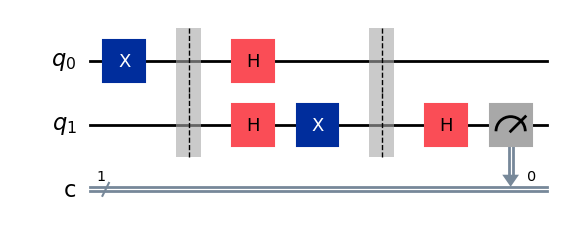

In [ ]:
# Agregar registros clásicos para las mediciones
Uf_sh_h_circuit_meas = QuantumCircuit(2, 1)

# Copiar el circuito ya construido
Uf_sh_h_circuit_meas.compose(Uf_sh_h_circuit, inplace=True)

# Agregar mediciones en los primeros n qubits
# Medir el qubit i en el bit clásico i IMPORTANTE
Uf_sh_h_circuit_meas.measure(1, 0)

# Dibujar el circuito final con medición
Uf_sh_h_circuit_meas.draw('mpl')

In [ ]:
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

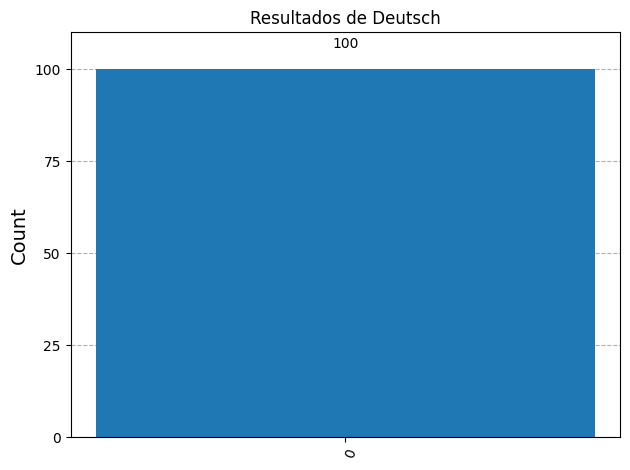

In [ ]:
# Número de shots (veces que se ejecuta el circuito)
shots = 100
# Crear el simulador
simulator = AerSimulator()
# Transpilar el circuito para optimizarlo en el simulador
compiled_circuit = transpile(Uf_sh_h_circuit_meas, simulator)
# Ejecutar el circuito en el simulador
job = simulator.run(compiled_circuit, shots=shots)
# Obtener resultados
result = job.result()
counts = result.get_counts()
# Dibujar histograma
plot_histogram(counts, title="Resultados de Deutsch")

# **Estado Inicial y Transformación de Hadamard**

El algoritmo comienza con el estado:

$$
\vert \psi_1 \rangle = \vert 0 \rangle \otimes \vert 1 \rangle = \vert 01 \rangle
$$

Aplicamos compuertas de Hadamard a ambos qubits:

$$
H \otimes H \, \vert 01 \rangle = \left( \frac{\vert 0 \rangle + \vert 1 \rangle}{\sqrt{2}} \right) \otimes \left( \frac{\vert 0 \rangle - \vert 1 \rangle}{\sqrt{2}} \right)
$$

$$
\vert \psi_2 \rangle = \frac{1}{2}(\vert 0 \rangle + \vert 1 \rangle) \otimes (\vert 0 \rangle - \vert 1 \rangle)
$$

# **Acción del Oráculo**

El oráculo implementa la transformación:

$$
U_f \vert x \rangle \vert y \rangle = \vert x \rangle \vert y \oplus f(x) \rangle
$$

La forma del estado después de aplicar el oráculo depende del tipo de función \( f(x) \).

$\textbf{Caso 1: \( f(x) = 0 \) (Función constante)}$

El oráculo no modifica el segundo qubit:

$$
U_f \vert x \rangle \vert y \rangle = \vert x \rangle \vert y \rangle
$$

$$
\vert \psi_3 \rangle = \frac{1}{2}(\vert 0 \rangle + \vert 1 \rangle) \otimes (\vert 0 \rangle - \vert 1 \rangle)
$$

Aplicamos Hadamard al primer qubit:

$$
H\left( \frac{\vert 0 \rangle + \vert 1 \rangle}{\sqrt{2}} \right) = \vert 0 \rangle
$$

$$
\vert \psi_4 \rangle = \vert 0 \rangle \otimes \left( \frac{\vert 0 \rangle - \vert 1 \rangle}{\sqrt{2}} \right)
$$

**Resultado: Se mide $0$ en el primer qubit. La función es constante.**

$\textbf{Caso 2: \( f(x) = 1 \) (Función constante)}$

El oráculo invierte el segundo qubit:

$$
U_f \vert x \rangle \vert y \rangle = \vert x \rangle \vert y \oplus 1 \rangle
$$

$$
\vert \psi_3 \rangle = \frac{1}{2}(\vert 0 \rangle + \vert 1 \rangle) \otimes (\vert 1 \rangle - \vert 0 \rangle) = \frac{1}{2}(\vert 0 \rangle + \vert 1 \rangle) \otimes (-\vert 0 \rangle + \vert 1 \rangle)
$$

Este estado es igual al caso anterior salvo una fase global. Después de aplicar Hadamard:

$$
\vert \psi_4 \rangle = \vert 0 \rangle \otimes (\cdots)
$$

**Resultado: Se mide $0$. La función es constante.**

$\textbf{Caso 3: \( f(x) = x \) (Función balanceada)}$

El oráculo realiza:

$$
U_f \vert x \rangle \vert y \rangle = \vert x \rangle \vert y \oplus x \rangle
$$

Entonces:

$$
\vert \psi_3 \rangle = \frac{1}{2}\left( \vert 0 \rangle (\vert 0 \rangle - \vert 1 \rangle) + \vert 1 \rangle (\vert 1 \rangle - \vert 0 \rangle) \right)
= \frac{1}{2}(\vert 0 \rangle - \vert 1 \rangle) \otimes (\vert 0 \rangle - \vert 1 \rangle)
$$

Aplicando Hadamard al primer qubit:

$$
H(\vert 0 \rangle - \vert 1 \rangle) = \vert 1 \rangle
$$

$$
\vert \psi_4 \rangle = \vert 1 \rangle \otimes (\vert 0 \rangle - \vert 1 \rangle)
$$

**Resultado: Se mide $1$ en el primer qubit. La función es balanceada.**

$\textbf{Caso 4: \( f(x) = \neg x \) (Función balanceada)}$

El oráculo aplica:

$$
U_f \vert x \rangle \vert y \rangle = \vert x \rangle \vert y \oplus \neg x \rangle
$$

Obtenemos:

$$
\vert \psi_3 \rangle = \frac{1}{2}\left( \vert 0 \rangle (\vert 1 \rangle - \vert 0 \rangle) + \vert 1 \rangle (\vert 0 \rangle - \vert 1 \rangle) \right)
= \frac{1}{2}(-\vert 0 \rangle + \vert 1 \rangle) \otimes (\vert 0 \rangle - \vert 1 \rangle)
$$

Después de Hadamard en el primer qubit:

$$
H(-\vert 0 \rangle + \vert 1 \rangle) = \vert 1 \rangle
$$

$$
\vert \psi_4 \rangle = \vert 1 \rangle \otimes (\cdots)
$$

**Resultado: Se mide $1$. La función es balanceada.**

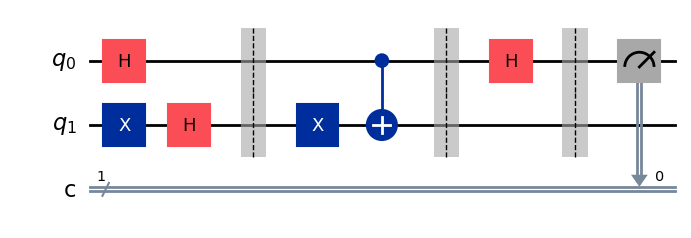

In [ ]:
# Crear circuito con 2 qubits y 1 bit clásico
dj_circuit_ex2 = QuantumCircuit(2, 1)

# Inicializar el segundo qubit en |1>
dj_circuit_ex2.x(1)

# Hadamard en ambos qubits
dj_circuit_ex2.h(0)
dj_circuit_ex2.h(1)

dj_circuit_ex2.barrier()

# Aplicar el oráculo balanceado 2
dj_circuit_ex2.x(1)
dj_circuit_ex2.cx(0, 1)
dj_circuit_ex2.barrier()

# Hadamard solo al primer qubit
dj_circuit_ex2.h(0)

dj_circuit_ex2.barrier()

# Medición del primer qubit
dj_circuit_ex2.measure(0, 0)

# Visualización
dj_circuit_ex2.draw('mpl')

In [ ]:
# Statevector(dj_circuit_ex2).draw('latex', max_size = 16, prefix="\\vert\\psi_3\\rangle = ")

$$\vert\psi_{3}\rangle =\vert 1\rangle\left(\frac{\vert 0\rangle -\vert 1\rangle}{\sqrt{2}}\right)=\vert 1\rangle\vert -\rangle$$

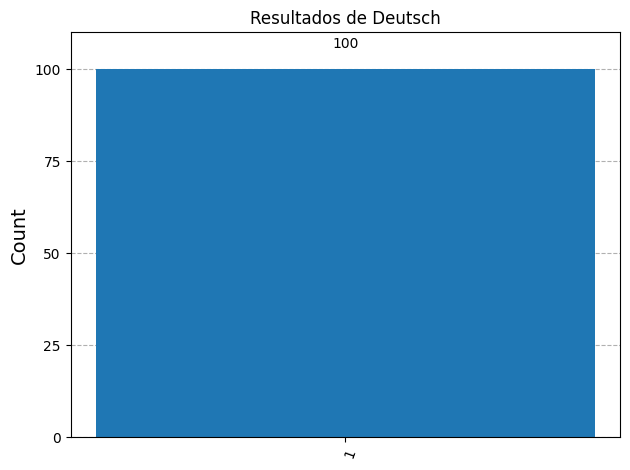

In [ ]:
# Número de shots (veces que se ejecuta el circuito)
shots = 100
# Crear el simulador
simulator = AerSimulator()
# Transpilar el circuito para optimizarlo en el simulador
compiled_circuit = transpile(dj_circuit_ex2, simulator)
# Ejecutar el circuito en el simulador
job = simulator.run(compiled_circuit, shots=shots)
# Obtener resultados
result = job.result()
counts = result.get_counts()
# Dibujar histograma
plot_histogram(counts, title="Resultados de Deutsch")